1. The Power of Ensembles


In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual classifiers
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)

# Create voting classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('tree', tree_clf), ('svm', svm_clf)],
    voting='soft'
)

# Train and evaluate individual classifiers
for clf in (log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}")

LogisticRegression: 0.8200
DecisionTreeClassifier: 0.9100
SVC: 0.9150
VotingClassifier: 0.9200


2. Bagging (Bootstrap Aggregating)

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base estimator
base_estimator = DecisionTreeClassifier()

# Create bagging classifier
bag_clf = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

# Train and evaluate
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Out-of-Bag Score: {bag_clf.oob_score_:.4f}")

Bagging Accuracy: 1.0000
Out-of-Bag Score: 0.9500


3. Random Forest Algorithm

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42
)

# Train and evaluate
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Out-of-Bag Score: {rf_clf.oob_score_:.4f}")

# Feature importance
importances = rf_clf.feature_importances_
print("\nFeature Importances:")
for i, imp in enumerate(importances):
    print(f"Feature {i}: {imp:.4f}")

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       106
           1       0.89      0.90      0.89        94

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Out-of-Bag Score: 0.8938

Feature Importances:
Feature 0: 0.0517
Feature 1: 0.0465
Feature 2: 0.0835
Feature 3: 0.0400
Feature 4: 0.0497
Feature 5: 0.0704
Feature 6: 0.0584
Feature 7: 0.0371
Feature 8: 0.0392
Feature 9: 0.0480
Feature 10: 0.0431
Feature 11: 0.0361
Feature 12: 0.1167
Feature 13: 0.0409
Feature 14: 0.0306
Feature 15: 0.0445
Feature 16: 0.0526
Feature 17: 0.0543
Feature 18: 0.0256
Feature 19: 0.0311


4. Extremely Randomized Trees (Extra-Trees)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Extra-Trees classifier
et_clf = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

# Train and evaluate
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Compare with Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.9649
Random Forest Accuracy: 0.9649


5. Boosting Methods Overview

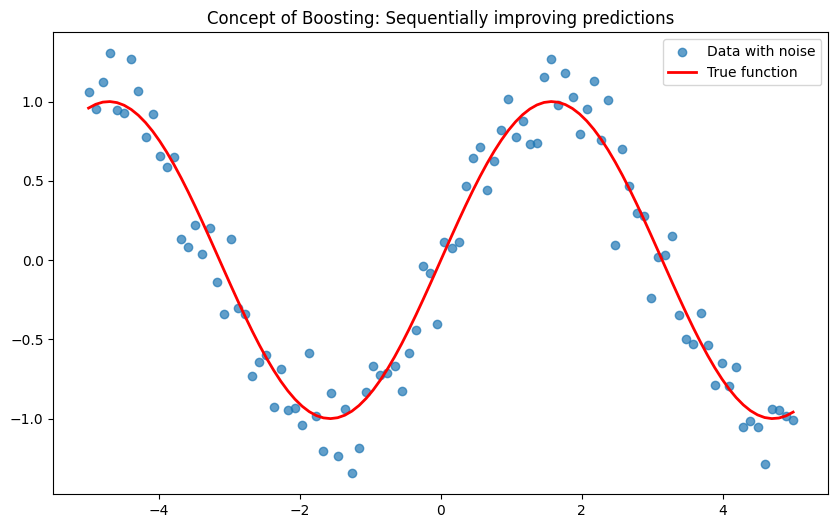

In [6]:
# This is a conceptual section - the actual implementations are in the specific boosting methods below
import matplotlib.pyplot as plt
import numpy as np

# Visualize how boosting works
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data with noise')
plt.plot(X, np.sin(X), 'r-', linewidth=2, label='True function')
plt.title("Concept of Boosting: Sequentially improving predictions")
plt.legend()
plt.show()

6. AdaBoost (Adaptive Boosting)

Accuracy: 0.8750
AUC Score: 0.9196


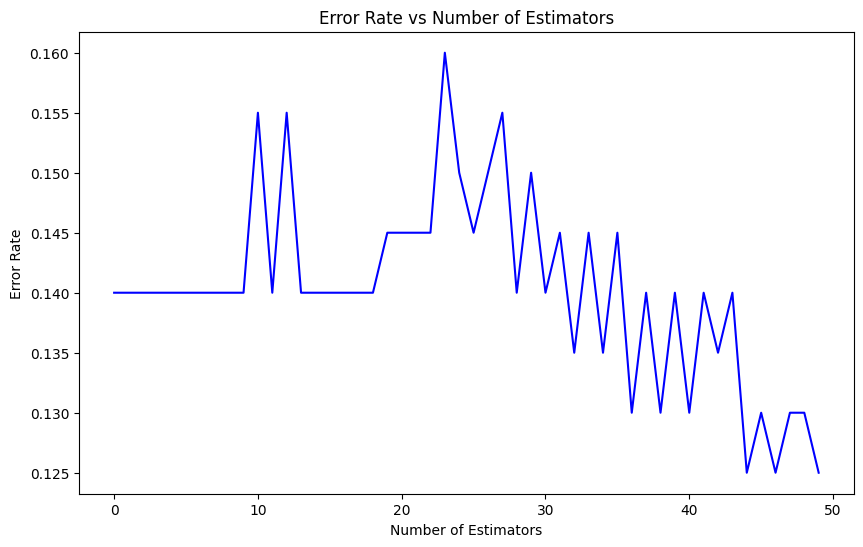

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base estimator (usually a weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision Stump

# Create AdaBoost classifier
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train and evaluate
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
y_proba = ada_clf.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Plot error rate vs number of estimators
errors = []
for y_pred in ada_clf.staged_predict(X_test):
    errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(errors, 'b-')
plt.title('Error Rate vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.show()

7. Gradient Boosting Machine (GBM)

Accuracy: 1.0000
Log Loss: 0.0033


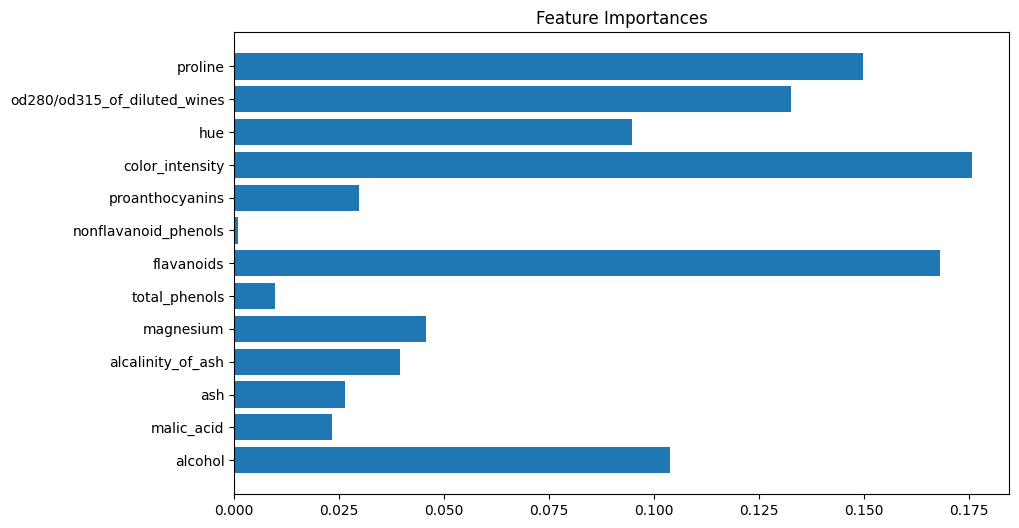

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import log_loss

# Load dataset
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create GBM classifier
gbm_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8,  # Stochastic Gradient Boosting
    max_features='sqrt',
    random_state=42
)

# Train and evaluate
gbm_clf.fit(X_train, y_train)
y_pred = gbm_clf.predict(X_test)
y_proba = gbm_clf.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Log Loss: {log_loss(y_test, y_proba):.4f}")

# Plot feature importance
importances = gbm_clf.feature_importances_
features = data.feature_names
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importances')
plt.show()

8. XGBoost (Extreme Gradient Boosting)

MSE: 0.2162


<Figure size 1000x600 with 0 Axes>

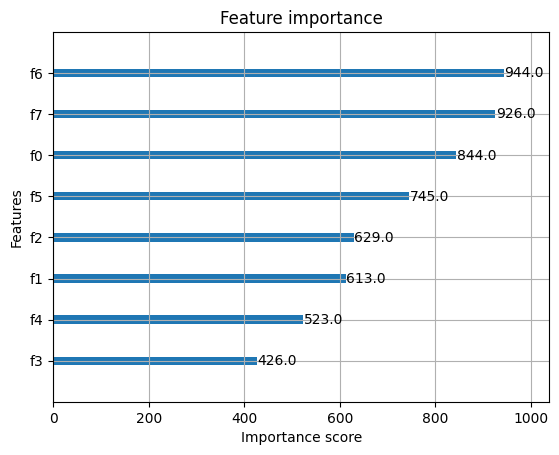

MSE (sklearn API): 0.2162


In [14]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (regression example)
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost (optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'alpha': 0,
    'lambda': 1,
    'random_state': 42
}

# Train model
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, y_pred) # Removed squared=False
print(f"MSE: {mse:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model)
plt.show()

# Scikit-learn API version (easier to use with sklearn tools)
xgb_reg = xgb.XGBRegressor(**params, n_estimators=num_round)
xgb_reg.fit(X_train, y_train)
y_pred_sk = xgb_reg.predict(X_test)
mse_sk = mean_squared_error(y_test, y_pred_sk) # Removed squared=False
print(f"MSE (sklearn API): {mse_sk:.4f}")

Bonus: LightGBM and CatBoost

In [18]:
# LightGBM example
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset (regression example)
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Parameters
params_lgb = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': -1
}

# Train
gbm = lgb.train(params_lgb, lgb_train, num_boost_round=100)
y_pred_lgb = gbm.predict(X_test)
print(f"LightGBM MSE: {mean_squared_error(y_test, y_pred_lgb):.4f}")

# CatBoost example
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)

cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print(f"CatBoost MSE: {mean_squared_error(y_test, y_pred_cat):.4f}")

LightGBM MSE: 0.2057
CatBoost MSE: 0.2661
